Iris Flower Classification - Machine Learning Project
Author: C.viswanath
Date: 10/4/2025

Installing the sckit-learn library

In [4]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 4.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.1 MB 4.5 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.1 MB 3.4 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.1 MB 3.6 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/11.1 MB 3.8 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.1 MB 3.6 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.1 MB 3.8 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.1 MB 3.9 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.1 MB 4.0 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 4.1 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.1 MB 4.2 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.1 MB 4.1 MB/s eta 0:00:01
   ---


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


This project illustrates the application of a machine learning classifier to categorize iris flower species – Setosa, Versicolor, and Virginica – using petal and sepal dimensions.

We shall:

1. load and visualise the Iris dataset

2. Fit a Random Forest Classifier

3. Evaluate the model performance

4. Predict with the new data


We start by importing libraries for data manipulation, visualization, and machine learning.

In [5]:
#Step 1: Importing Required Libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

Using the built-in Iris dataset available in `sklearn.datasets`.

In [7]:
# Step 2: Loading the Dataset.
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)


We shall now visualize the pairwise relationships between features colored by species.

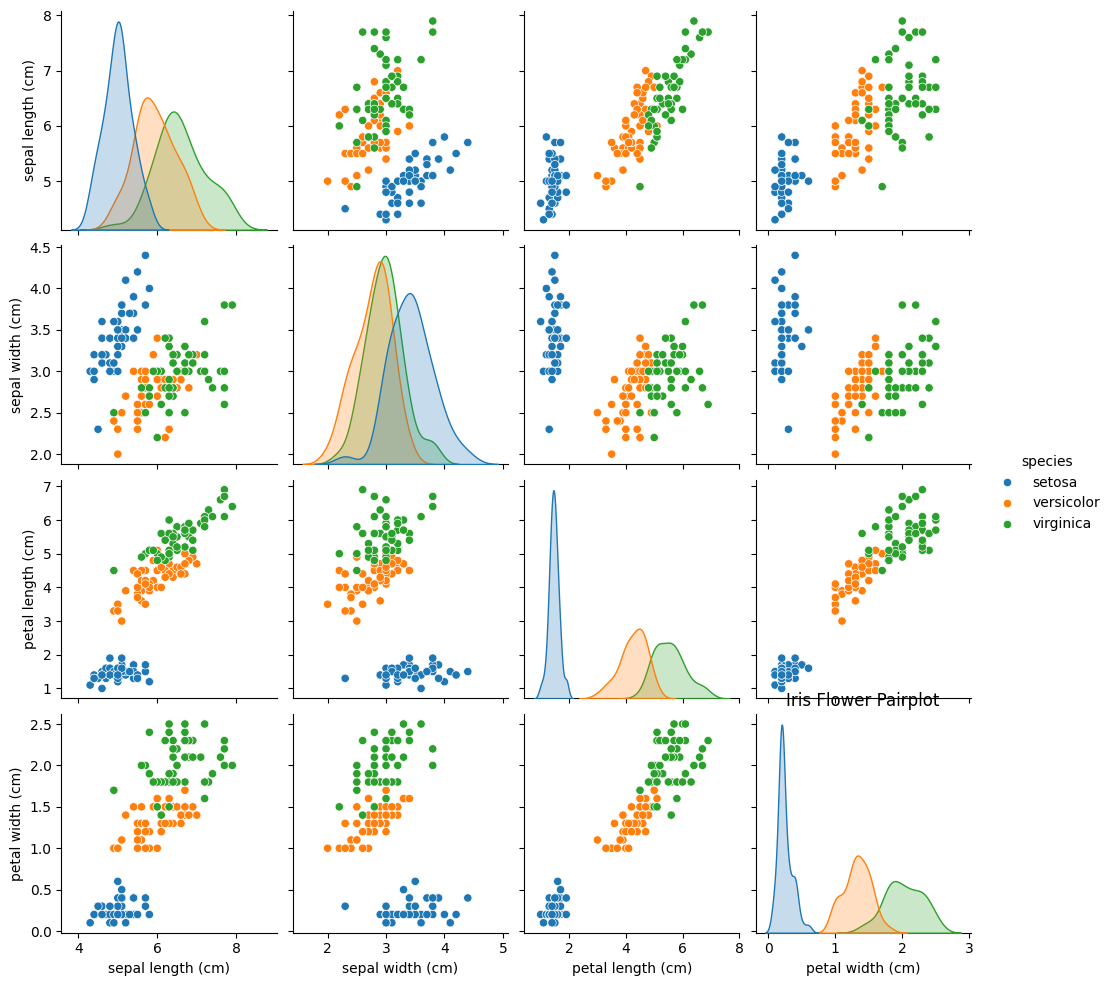

In [8]:
# Step 3: Visualize the Data
y_named = y.map(dict(zip(range(3), iris.target_names)))
data = pd.concat([X, y_named.rename("species")], axis=1)
sns.pairplot(data, hue="species")
plt.title("Iris Flower Pairplot")
plt.show()


We split the dataset into features (`X`) and labels (`y`) and perform train-test split.

In [9]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


We use `StandardScaler` to normalize the feature values, which helps many models perform better.

In [17]:
# Step 5: Scaling the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


We shall use Random Forest Classifier to train our model on the training dataset.

In [11]:
# Step 6: Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)


We shall check the model's performance using accuracy, classification report, and confusion matrix.

In [12]:
# Step 7: Model Evaluation
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45




We shall save the trained model and scaler using `joblib` so that we can use it again later for predictions.

In [13]:
# Step 8: Save the Model and Scaler
joblib.dump(model, "iris_classifier_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\nModel and scaler saved successfully!")


Model and scaler saved successfully!


In [16]:
# Step 9: Example Prediction
sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=iris.feature_names)
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
target_names = iris.target_names
print("\nPredicted class for sample:", target_names[prediction[0]])


Predicted class for sample: setosa


Conclusion:

An effective machine-learning model capable of classifying iris flowers was built and tested successfully.

The trained model is highly accurate and sufficiently robust to make predictions on fresh datasets.

The project encapsulates a use case of supervised learning in a classification problem.